## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> تست فرض 1 </div>


In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> خواندن دیتا </div>


In [3]:
df = pd.read_csv('df_test1.csv')
df.head()


,Address,province,ur,income
0,21401545208,CharmahalBakhtiari,R,146040000.0
1,21401545211,CharmahalBakhtiari,R,428060000.0
2,21401545214,CharmahalBakhtiari,R,170000000.0
3,21401545217,CharmahalBakhtiari,R,53660000.0
4,21401545217,CharmahalBakhtiari,R,53660000.0


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی دیتا </div>


In [5]:
df.describe()


,Address,income
count,4.491000e+03,4.491000e+03
mean,1.571316e+10,2.793771e+09
std,4.953224e+09,7.240888e+09
min,1.140117e+10,1.446000e+07
25%,1.140218e+10,5.725250e+08
50%,1.140818e+10,1.294710e+09
75%,2.140455e+10,2.564405e+09
max,2.140955e+10,1.672000e+11


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4491 entries, 0 to 4490
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Address   4491 non-null   int64  
 1   province  4491 non-null   object 
 2   ur        4491 non-null   object 
 3   income    4491 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 140.5+ KB


In [8]:
df['ur'].unique()


array(['R', 'U'], dtype=object)

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> جدا سازی افراد شهری و روستایی</div>


In [10]:
province_filter = df['province'] == 'CharmahalBakhtiari'
urban_data = df[(province_filter) & (df['ur'] == 'U')]
rural_data = df[(province_filter) & (df['ur'] == 'R')]


In [11]:
urban_data['income'].describe()


count    2.556000e+03
mean     3.487725e+09
std      9.111320e+09
min      2.100000e+07
25%      5.995400e+08
50%      1.500130e+09
75%      3.113710e+09
max      1.672000e+11
Name: income, dtype: float64

In [12]:
rural_data['income'].describe()


count    1.935000e+03
mean     1.877106e+09
std      3.251737e+09
min      1.446000e+07
25%      5.373350e+08
50%      1.146230e+09
75%      1.974250e+09
max      3.728418e+10
Name: income, dtype: float64

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار مقایسه توزیع درآمد بین افراد شهری و روستایی</div>


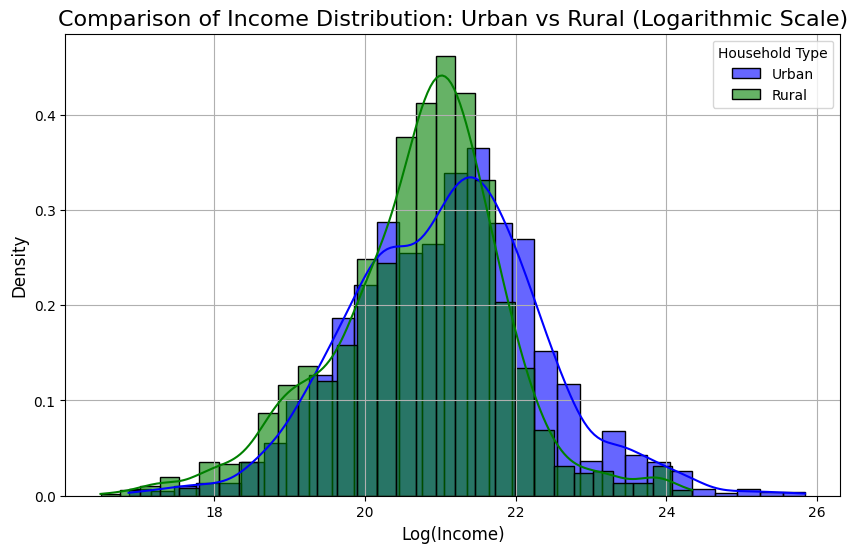

In [22]:
plt.figure(figsize=(10,6))
urban_income_log = np.log1p(urban_data['income'])
rural_income_log = np.log1p(rural_data['income'])
sns.histplot(urban_income_log, color='blue', kde=True, label='Urban', stat='density', bins=30, alpha=0.6)
sns.histplot(rural_income_log, color='green', kde=True, label='Rural', stat='density', bins=30, alpha=0.6)
plt.title('Comparison of Income Distribution: Urban vs Rural (Logarithmic Scale)', fontsize=16)
plt.xlabel('Log(Income)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title="Household Type")
plt.grid(True)
plt.show()


- <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;">  برای اینکه داده های پرت تاثیر چندانی روی نمایش نمودار توزیع نداشته باشند از مقیاس لاگ استفاده شده</div>


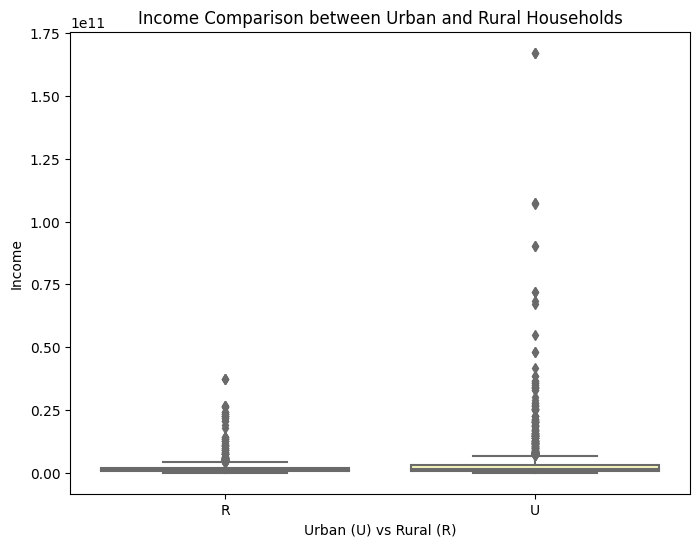

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ur', y='income', data=df[df['province'] == 'CharmahalBakhtiari'], palette='Set3')
plt.title('Income Comparison between Urban and Rural Households')
plt.xlabel('Urban (U) vs Rural (R)')
plt.ylabel('Income')
plt.show()


In [18]:
t_stat, p_value = stats.ttest_ind(urban_data['income'], rural_data['income'], equal_var=False)

print(f"T-statistic: {t_stat}") 
print(f"P-value: {p_value}")


T-statistic: 8.26845642820047
P-value: 1.9315084811718738e-16


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> گزارش آزمون فرض</div>


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;">گزارش آزمون فرض</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
    آزمون فرض برای بررسی این سوال انجام شد که آیا درآمد خانوارهای شهری و روستایی در استان چهارمحال و بختیاری برابر است یا خیر. برای این منظور، از آزمون t دو نمونه‌ای مستقل استفاده کردیم. نتایج این آزمون به شرح زیر است:
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>آمار آزمون (T-statistic):</strong> <span style="color: #e74c3c;">8.27</span></li>
    <li><strong>p-value مقدار :</strong> <span style="color: #e74c3c;">1.93e-16</span></li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    با توجه به مقدار بسیار کم p-value (که بسیار کمتر از سطح معنی‌داری معمول 0.05 است)، می‌توان نتیجه گرفت که فرض بیان شده رد می‌شود. به عبارت دیگر، اختلاف معنی‌داری بین میانگین درآمد خانوارهای شهری و روستایی در استان چهارمحال و بختیاری وجود دارد.
  </p>

  <p style="font-size: 16px; line-height: 1.6;">
    آمار آزمون (T-statistic) نیز نشان می‌دهد که اختلاف میانگین درآمد خانوارهای شهری و روستایی بسیار بزرگ است. بنابراین می‌توانیم با اطمینان بالایی نتیجه‌گیری کنیم که درآمد خانوارهای شهری به طور قابل توجهی بیشتر از درآمد خانوارهای روستایی است.
  </p>

  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در نهایت، نتیجه آزمون نشان‌دهنده این است که درآمد خانوارهای شهری و روستایی در استان چهارمحال و بختیاری برابر نیستند و تفاوت معناداری بین این دو گروه وجود دارد.
  </p>
</div>
